In [65]:
import pandas as pd 
import sweetviz as sv
from sklearn.preprocessing import OrdinalEncoder
from sklearn.neighbors  import KNeighborsClassifier
import matplotlib.pyplot as plt

In [66]:
train_path = "../data/raw/train.csv"
test_path = "../data/raw/test.csv"
df_train = pd.read_csv(train_path, na_values="N/D")
df_test = pd.read_csv(test_path, na_values="N/D")

In [67]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5340 entries, 0 to 5339
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   CLAVE DE INMUEBLE               5340 non-null   object
 1   TECNOLOGIA INSTALADA            5326 non-null   object
 2   ANCHO DE BANDA CONTRATADO 2014  5326 non-null   object
 3   INSTITUCION                     5340 non-null   object
 4   NOMBRE DEL CENTRO               5095 non-null   object
 5   TURNO/HORARIO                   4108 non-null   object
 6   NIVEL                           4248 non-null   object
 7   REGION                          5298 non-null   object
 8   MUNICIPIO                       5338 non-null   object
 9   LOCALIDAD                       4915 non-null   object
 10  DOMICILIO                       5245 non-null   object
 11  CODIGO POSTAL                   4832 non-null   object
 12  LONGITUD                        5287 non-null   

In [68]:
df_train.isna().sum()

CLAVE DE INMUEBLE                    0
TECNOLOGIA INSTALADA                14
ANCHO DE BANDA CONTRATADO 2014      14
INSTITUCION                          0
NOMBRE DEL CENTRO                  245
TURNO/HORARIO                     1232
NIVEL                             1092
REGION                              42
MUNICIPIO                            2
LOCALIDAD                          425
DOMICILIO                           95
CODIGO POSTAL                      508
LONGITUD                            53
LATITUD                             53
ESTATUS                              0
dtype: int64

In [69]:
df_test.isna().sum()

CLAVE DE INMUEBLE                   1
TECNOLOGIA INSTALADA                5
ANCHO DE BANDA CONTRATADO 2014      4
INSTITUCION                         0
NOMBRE DEL CENTRO                  65
TURNO/HORARIO                     294
NIVEL                             262
REGION                             14
MUNICIPIO                           2
LOCALIDAD                         112
DOMICILIO                          30
CODIGO POSTAL                     134
LONGITUD                           21
LATITUD                            21
ESTATUS                             0
dtype: int64

In [70]:
proyect = sv.analyze(df_train)
# proyect.show_html()

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


In [71]:
for columna in df_train.columns:
    df_train[columna].fillna(df_train[columna].mode()[0], inplace= True)

for columna in df_test.columns:
    df_test[columna].fillna(df_test[columna].mode()[0], inplace= True)

C:\Users\esteb\AppData\Local\Temp\ipykernel_18604\3972499278.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train[columna].fillna(df_train[columna].mode()[0], inplace= True)
C:\Users\esteb\AppData\Local\Temp\ipykernel_18604\3972499278.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [72]:
df_train.isna().sum()

CLAVE DE INMUEBLE                 0
TECNOLOGIA INSTALADA              0
ANCHO DE BANDA CONTRATADO 2014    0
INSTITUCION                       0
NOMBRE DEL CENTRO                 0
TURNO/HORARIO                     0
NIVEL                             0
REGION                            0
MUNICIPIO                         0
LOCALIDAD                         0
DOMICILIO                         0
CODIGO POSTAL                     0
LONGITUD                          0
LATITUD                           0
ESTATUS                           0
dtype: int64

In [73]:
df_test.isna().sum()

CLAVE DE INMUEBLE                 0
TECNOLOGIA INSTALADA              0
ANCHO DE BANDA CONTRATADO 2014    0
INSTITUCION                       0
NOMBRE DEL CENTRO                 0
TURNO/HORARIO                     0
NIVEL                             0
REGION                            0
MUNICIPIO                         0
LOCALIDAD                         0
DOMICILIO                         0
CODIGO POSTAL                     0
LONGITUD                          0
LATITUD                           0
ESTATUS                           0
dtype: int64

In [74]:
df_train

,CLAVE DE INMUEBLE,TECNOLOGIA INSTALADA,ANCHO DE BANDA CONTRATADO 2014,INSTITUCION,NOMBRE DEL CENTRO,TURNO/HORARIO,NIVEL,REGION,MUNICIPIO,LOCALIDAD,DOMICILIO,CODIGO POSTAL,LONGITUD,LATITUD,ESTATUS
0,1405322E,INALAMBRICA,2 MB,SEJ,PEDRO MORENO,MATUTINO,SECUNDARIA,SUR,SAN GABRIEL,APANGO,PORFIRIO DIAZ S/N,49710,-103.7115472,19.7825444,SUSPENDIDO
1,1405225E,iMAX,2 MB,SEJ,VICENTE GUERRERO,VESPERTINO,PRIMARIA,SUR,TEOCUITATLAN DE CORONA,AGUA HONDA,CONOCIDO,49250,-103.3862611,20.1350306,SIN SERVICIO
2,1408861J,iMAX,2 MB,SEJ,RAMON G BONFIL,MATUTINO,PRIMARIA,CENTRO,GUADALAJARA,GUADALAJARA,VASCO UÑEZ DE BALBOA 2699 ENTRE FRANCISCO VAZQ...,44930,-103.374,20.74,ACTIVO
3,1405004F,iMAX,2 MB,SEJ,USAER TUXPAN,MATUTINO,ESPECIAL,SUR,TUXPAN,TUXPAN,AVENIDA TIZATIRLA 37,49800,-103.3759833,19.5545,ACTIVO
4,1401476H,iMAX,2 MB,SEJ,JOSE MA MORELOS Y PAVON,VESPERTINO,PRIMARIA,NORTE,HUEJUCAR,LAS CA_AS,MORELOS 23,46260,-103.3429333,22.3079917,SIN SERVICIO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5335,SC_279,iMAX,2 MB,SC,FRANCISCO MEDINA ASCENCIO,09:00 a 20:00,ESTATAL,CENTRO,ZAPOTLANEJO,ZAPOTLANEJO,AV. JUAREZ # 83,45430,-103.0675,20.6266667,SIN SERVICIO
5336,1407915K,ADSL,10 MB,SEJ,18 DE SEPTIEMBRE,MATUTINO,PRIMARIA,CENTRO,GUADALAJARA,GUADALAJARA,DAMIAN CARMONA 724,44700,-103.3080056,20.6802833,SUSPENDIDO
5337,JCSSA007725,ADSL,10 MB,SSJ,MîDULO EL ROSARIO TONALA II,MATUTINO,PRIMARIA,CENTRO,TONALA,TONALA,REFORMA # 7,45416,-103.3461111,20.6763889,SUSPENDIDO
5338,1402927B,ADSL,2 MB,SEJ,J JESUS GONZALEZ GALLO,MATUTINO,PRIMARIA,ALTOS SUR,YAHUALICA DE GONZALEZ GALLO,YAHUALICA DE GONZALEZ GALLO,MARIANO JIMENEZ 247,47300,-102.8887361,21.183225,SUSPENDIDO


In [75]:
out_list = ["CLAVE DE INMUEBLE", "NOMBRE DEL CENTRO", "CODIGO POSTAL", "LONGITUD", "LATITUD"]
out_colums_train = df_train[out_list]
df_train = df_train.drop(out_list, axis = 1)
out_colums_test = df_test[out_list]
df_test = df_test.drop(out_list, axis = 1)

*Crea una lista de las columnas categóricas en tus datos*  
*Combina los conjuntos de entrenamiento y prueba para asegurarte de tener todas las categorías*  
*Filtra las columnas categóricas para que solo incluyan aquellas que sean de tipo cadena*  
*Crea el codificador OrdinalEncoder*
*Ajusta el codificador a los datos combinados*
*Transforma las características categóricas en ambos conjuntos*


In [76]:
columnas_categoricas = df_train.select_dtypes(include=['object']).columns.tolist()

combined_data = pd.concat([df_train, df_test])

columnas_categoricas_string = combined_data[columnas_categoricas].select_dtypes(include=['object']).columns.tolist()

encoder = OrdinalEncoder()

encoder.fit(combined_data[columnas_categoricas_string])

df_train[columnas_categoricas] = encoder.transform(df_train[columnas_categoricas_string])
df_test[columnas_categoricas] = encoder.transform(df_test[columnas_categoricas_string])



In [77]:
columnas_categoricas_string

['TECNOLOGIA INSTALADA',
 'ANCHO DE BANDA CONTRATADO 2014',
 'INSTITUCION',
 'TURNO/HORARIO',
 'NIVEL',
 'REGION',
 'MUNICIPIO',
 'LOCALIDAD',
 'DOMICILIO',
 'ESTATUS']

In [78]:
df_train    

,TECNOLOGIA INSTALADA,ANCHO DE BANDA CONTRATADO 2014,INSTITUCION,TURNO/HORARIO,NIVEL,REGION,MUNICIPIO,LOCALIDAD,DOMICILIO,ESTATUS
0,3.0,3.0,20.0,74.0,107.0,10.0,75.0,35.0,3843.0,2.0
1,0.0,3.0,20.0,79.0,103.0,10.0,98.0,13.0,1405.0,1.0
2,0.0,3.0,20.0,74.0,103.0,2.0,40.0,346.0,4595.0,0.0
3,0.0,3.0,20.0,74.0,83.0,10.0,114.0,1000.0,876.0,0.0
4,0.0,3.0,20.0,79.0,103.0,6.0,42.0,520.0,3461.0,1.0
...,...,...,...,...,...,...,...,...,...,...
5335,0.0,3.0,17.0,28.0,84.0,2.0,132.0,1041.0,519.0,1.0
5336,1.0,0.0,20.0,74.0,103.0,2.0,40.0,346.0,1600.0,2.0
5337,1.0,0.0,22.0,74.0,103.0,2.0,107.0,987.0,4164.0,2.0
5338,1.0,3.0,20.0,74.0,103.0,1.0,124.0,1028.0,3272.0,2.0


In [79]:
df_test

,TECNOLOGIA INSTALADA,ANCHO DE BANDA CONTRATADO 2014,INSTITUCION,TURNO/HORARIO,NIVEL,REGION,MUNICIPIO,LOCALIDAD,DOMICILIO,ESTATUS
0,0.0,3.0,11.0,74.0,103.0,13.0,2.0,346.0,2115.0,0.0
1,1.0,3.0,22.0,74.0,103.0,13.0,82.0,305.0,3603.0,2.0
2,1.0,0.0,20.0,74.0,103.0,10.0,87.0,921.0,2023.0,2.0
3,0.0,3.0,20.0,74.0,103.0,3.0,111.0,755.0,3371.0,1.0
4,0.0,3.0,20.0,74.0,103.0,2.0,107.0,987.0,2245.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1330,0.0,3.0,20.0,79.0,83.0,13.0,2.0,20.0,3869.0,0.0
1331,0.0,3.0,20.0,74.0,107.0,2.0,103.0,498.0,4590.0,0.0
1332,1.0,3.0,20.0,74.0,103.0,10.0,98.0,806.0,3444.0,2.0
1333,0.0,3.0,22.0,74.0,103.0,6.0,42.0,517.0,2003.0,1.0


In [80]:
df_train = pd.merge(df_train, out_colums_train, left_index=True, right_index=True)
df_test = pd.merge(df_test, out_colums_test, left_index=True, right_index=True)


In [81]:
df_train

,TECNOLOGIA INSTALADA,ANCHO DE BANDA CONTRATADO 2014,INSTITUCION,TURNO/HORARIO,NIVEL,REGION,MUNICIPIO,LOCALIDAD,DOMICILIO,ESTATUS,CLAVE DE INMUEBLE,NOMBRE DEL CENTRO,CODIGO POSTAL,LONGITUD,LATITUD
0,3.0,3.0,20.0,74.0,107.0,10.0,75.0,35.0,3843.0,2.0,1405322E,PEDRO MORENO,49710,-103.7115472,19.7825444
1,0.0,3.0,20.0,79.0,103.0,10.0,98.0,13.0,1405.0,1.0,1405225E,VICENTE GUERRERO,49250,-103.3862611,20.1350306
2,0.0,3.0,20.0,74.0,103.0,2.0,40.0,346.0,4595.0,0.0,1408861J,RAMON G BONFIL,44930,-103.374,20.74
3,0.0,3.0,20.0,74.0,83.0,10.0,114.0,1000.0,876.0,0.0,1405004F,USAER TUXPAN,49800,-103.3759833,19.5545
4,0.0,3.0,20.0,79.0,103.0,6.0,42.0,520.0,3461.0,1.0,1401476H,JOSE MA MORELOS Y PAVON,46260,-103.3429333,22.3079917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5335,0.0,3.0,17.0,28.0,84.0,2.0,132.0,1041.0,519.0,1.0,SC_279,FRANCISCO MEDINA ASCENCIO,45430,-103.0675,20.6266667
5336,1.0,0.0,20.0,74.0,103.0,2.0,40.0,346.0,1600.0,2.0,1407915K,18 DE SEPTIEMBRE,44700,-103.3080056,20.6802833
5337,1.0,0.0,22.0,74.0,103.0,2.0,107.0,987.0,4164.0,2.0,JCSSA007725,MîDULO EL ROSARIO TONALA II,45416,-103.3461111,20.6763889
5338,1.0,3.0,20.0,74.0,103.0,1.0,124.0,1028.0,3272.0,2.0,1402927B,J JESUS GONZALEZ GALLO,47300,-102.8887361,21.183225


In [82]:
df_train.isna().sum()

TECNOLOGIA INSTALADA              0
ANCHO DE BANDA CONTRATADO 2014    0
INSTITUCION                       0
TURNO/HORARIO                     0
NIVEL                             0
REGION                            0
MUNICIPIO                         0
LOCALIDAD                         0
DOMICILIO                         0
ESTATUS                           0
CLAVE DE INMUEBLE                 0
NOMBRE DEL CENTRO                 0
CODIGO POSTAL                     0
LONGITUD                          0
LATITUD                           0
dtype: int64

In [83]:
df_test.isna().sum()

TECNOLOGIA INSTALADA              0
ANCHO DE BANDA CONTRATADO 2014    0
INSTITUCION                       0
TURNO/HORARIO                     0
NIVEL                             0
REGION                            0
MUNICIPIO                         0
LOCALIDAD                         0
DOMICILIO                         0
ESTATUS                           0
CLAVE DE INMUEBLE                 0
NOMBRE DEL CENTRO                 0
CODIGO POSTAL                     0
LONGITUD                          0
LATITUD                           0
dtype: int64

In [84]:
df_train[df_train["LONGITUD"] == ' 103¡42\'05.7" ']

,TECNOLOGIA INSTALADA,ANCHO DE BANDA CONTRATADO 2014,INSTITUCION,TURNO/HORARIO,NIVEL,REGION,MUNICIPIO,LOCALIDAD,DOMICILIO,ESTATUS,CLAVE DE INMUEBLE,NOMBRE DEL CENTRO,CODIGO POSTAL,LONGITUD,LATITUD
98,0.0,3.0,22.0,74.0,103.0,13.0,89.0,168.0,2858.0,1.0,JCSSA007865,CUXPALA,45341,"103¡42'05.7""",20¡38'58.9


In [85]:
df_train = df_train.drop(4145)

In [86]:
df_train["CODIGO POSTAL"] = df_train["CODIGO POSTAL"].astype(float)

In [87]:
df_train.dtypes

TECNOLOGIA INSTALADA              float64
ANCHO DE BANDA CONTRATADO 2014    float64
INSTITUCION                       float64
TURNO/HORARIO                     float64
NIVEL                             float64
REGION                            float64
MUNICIPIO                         float64
LOCALIDAD                         float64
DOMICILIO                         float64
ESTATUS                           float64
CLAVE DE INMUEBLE                  object
NOMBRE DEL CENTRO                  object
CODIGO POSTAL                     float64
LONGITUD                           object
LATITUD                            object
dtype: object

In [88]:
dropted = ["ANCHO DE BANDA CONTRATADO 2014", "CLAVE DE INMUEBLE", "NOMBRE DEL CENTRO", "LONGITUD", "LATITUD"]
X_train = df_train.drop(dropted, axis = 1)
y_train = df_train["ANCHO DE BANDA CONTRATADO 2014"]
X_test = df_test.drop(dropted, axis = 1)
y_test = df_test["ANCHO DE BANDA CONTRATADO 2014"]


In [89]:
k_values = [x for x in range(1,50,2)]
scores = []
for k in k_values:
    clf = KNeighborsClassifier(n_neighbors= k )
    clf.fit(X_train,y_train)
    acc = clf.score(X_test,y_test)
    scores.append(acc)

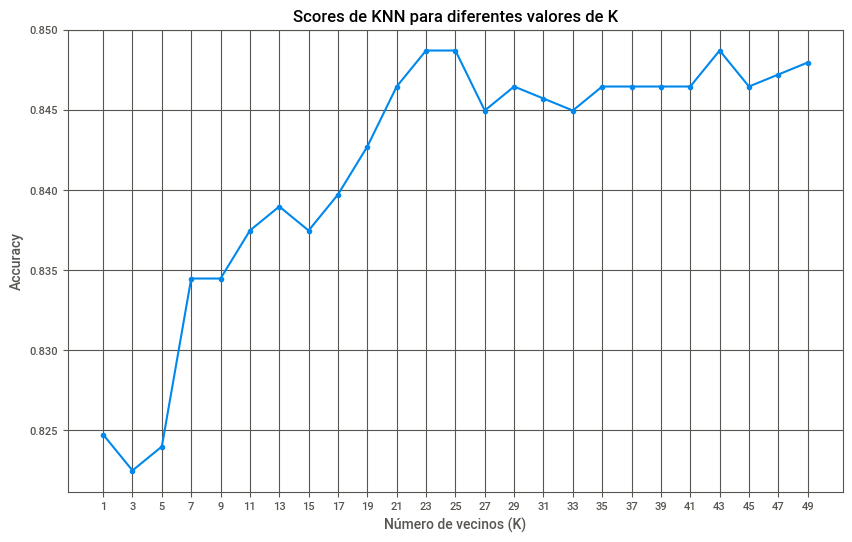

In [90]:
# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(k_values, scores, marker='o')
plt.title('Scores de KNN para diferentes valores de K')
plt.xlabel('Número de vecinos (K)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.savefig('../reports/figures/knn_scores.png')
plt.show()

In [91]:
clf = KNeighborsClassifier(n_neighbors= 21 )
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.846441947565543

In [92]:
X_train.shape

(5339, 10)

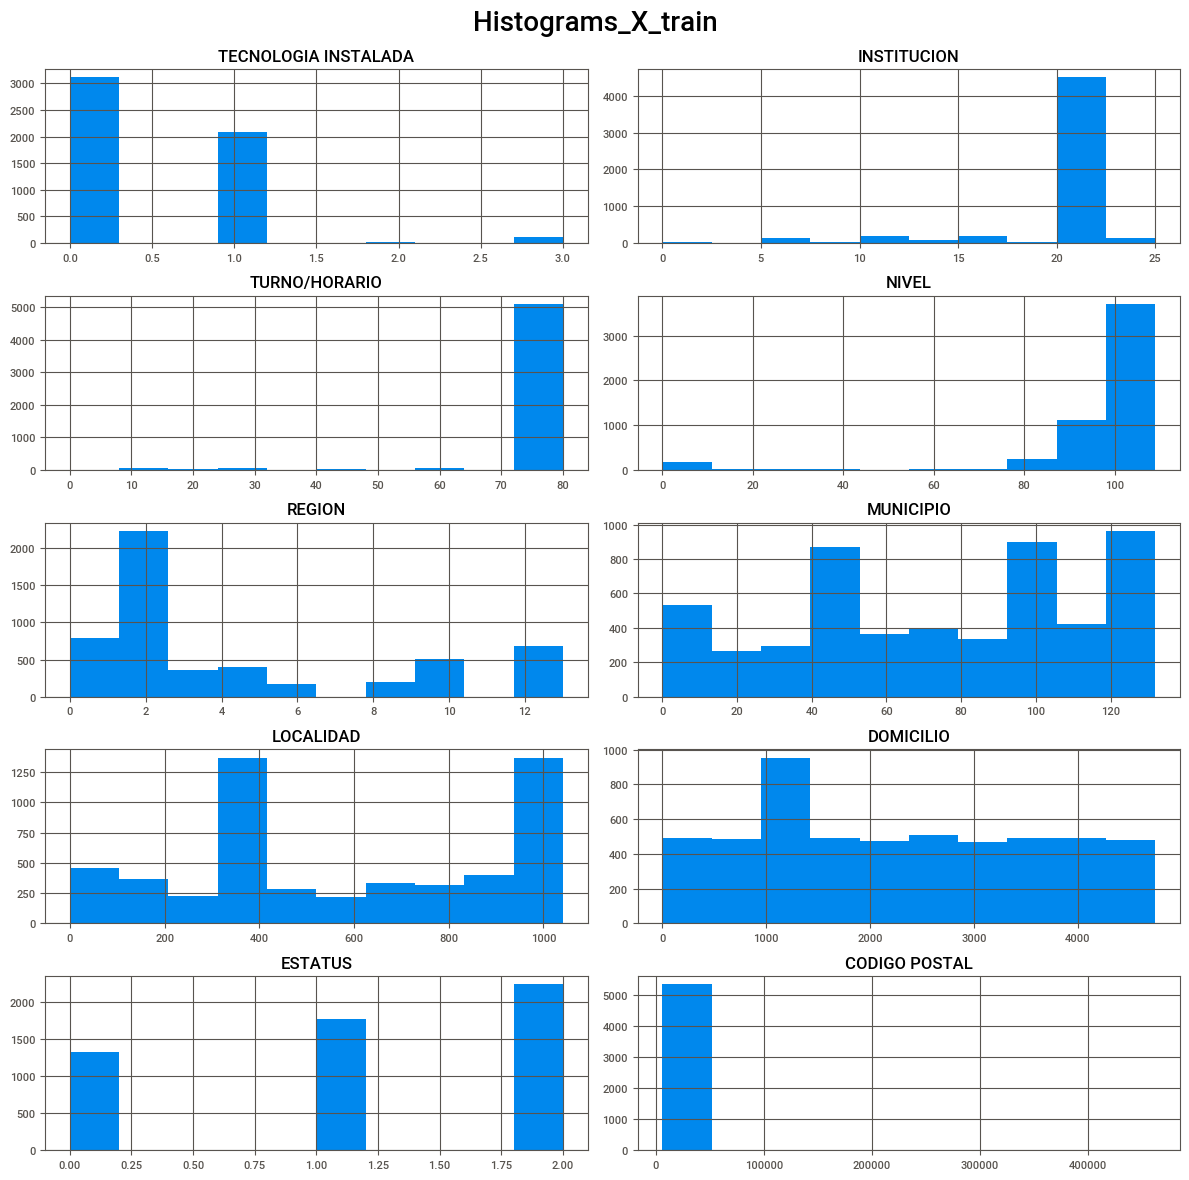

In [93]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 12))

for i, col in enumerate(X_train.columns):
    ax = axes[i // 2, i % 2]
    X_train[col].hist(ax=ax)
    ax.set_title(col)
    ax.grid(True)

plt.tight_layout()
plt.suptitle('Histograms_X_train', fontsize=20)
plt.subplots_adjust(top=0.93)
plt.savefig('../reports/figures/histograms_x_train.png')
plt.show()

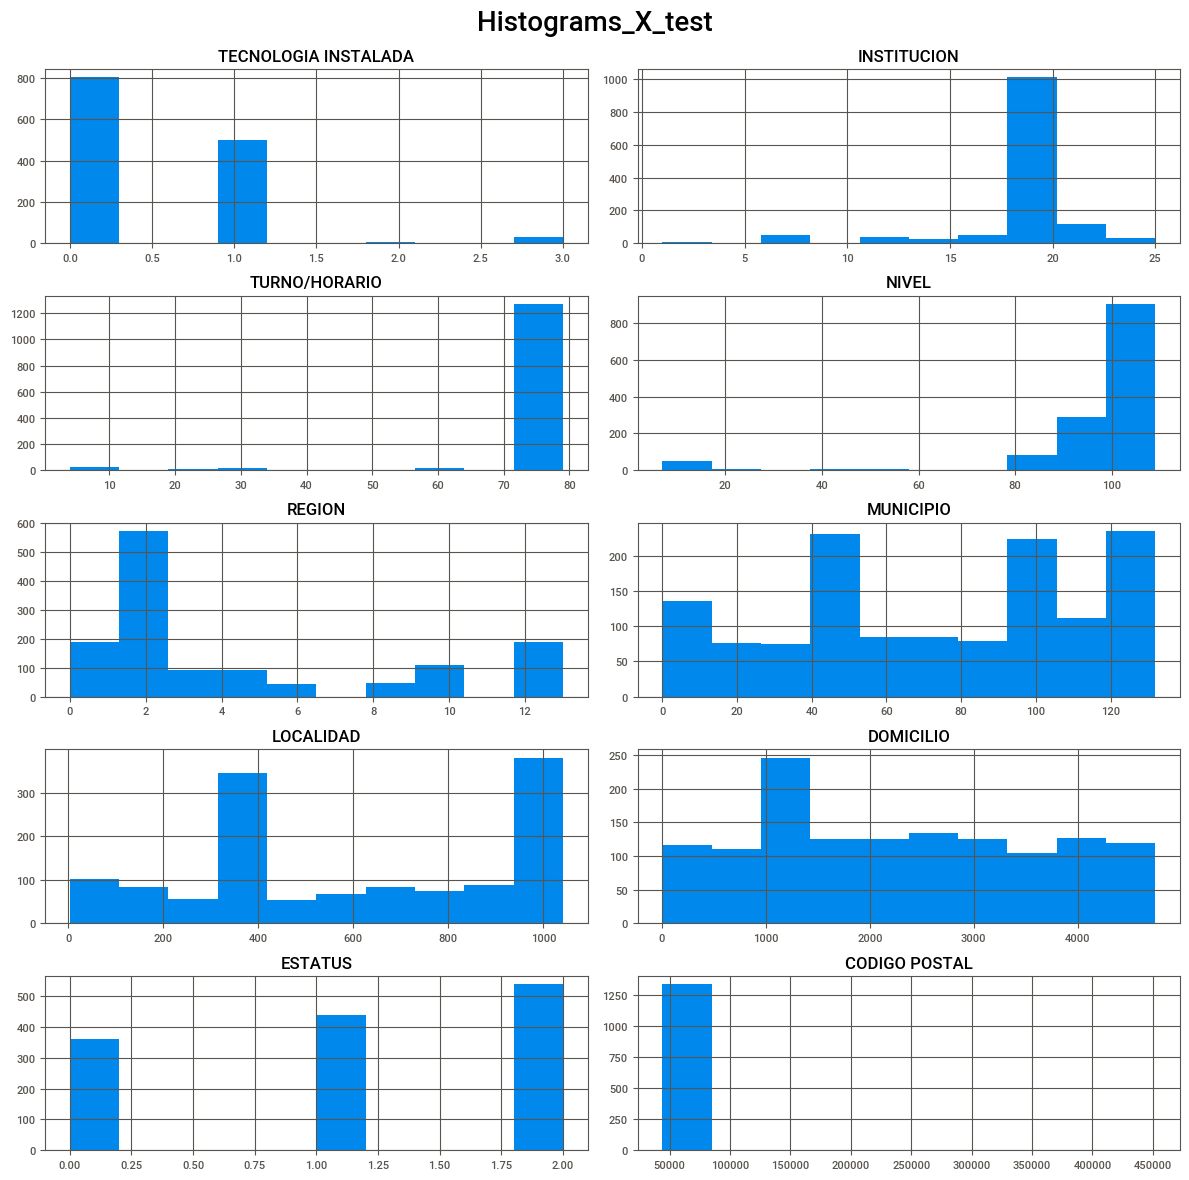

In [94]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 12))

for i, col in enumerate(X_test.columns):
    ax = axes[i // 2, i % 2]
    X_test[col].hist(ax=ax)
    ax.set_title(col)
    ax.grid(True)

plt.tight_layout()
plt.suptitle('Histograms_X_test', fontsize=20)
plt.subplots_adjust(top=0.93)
plt.savefig('../reports/figures/histograms_x_test.png')
plt.show()

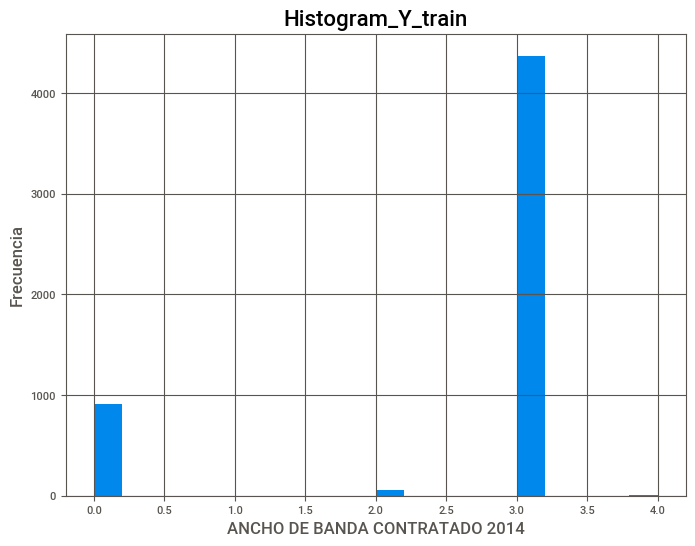

In [95]:
columna_seleccionada = 'ANCHO DE BANDA CONTRATADO 2014'

plt.figure(figsize=(8, 6))
plt.hist(y_train, bins=20)
plt.title(f'Histogram_Y_train', fontsize=16)  
plt.xlabel(columna_seleccionada, fontsize=12)  
plt.ylabel('Frecuencia', fontsize=12)  
plt.grid(True)
plt.savefig('../reports/figures/histograms_y_train.png')
plt.show()

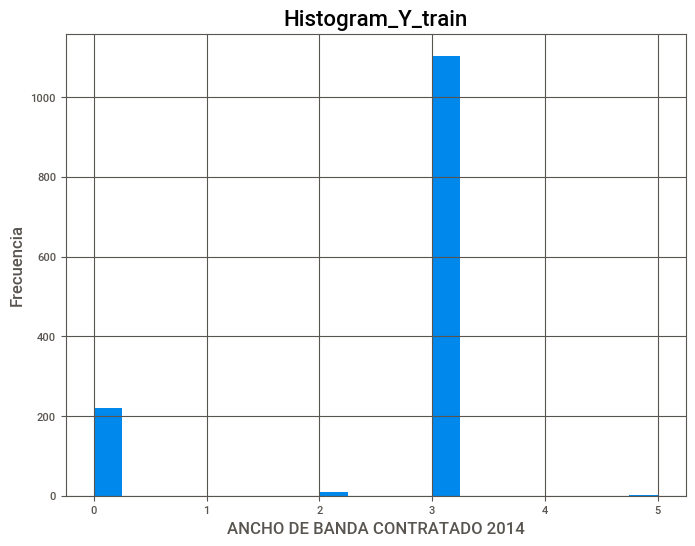

In [96]:
columna_seleccionada = 'ANCHO DE BANDA CONTRATADO 2014'

plt.figure(figsize=(8, 6))
plt.hist(y_test, bins=20)
plt.title(f'Histogram_Y_train', fontsize=16)  
plt.xlabel(columna_seleccionada, fontsize=12)  
plt.ylabel('Frecuencia', fontsize=12)  
plt.grid(True)
plt.savefig('../reports/figures/histograms_y_test.png')
plt.show()